Le plan des moindres carrés est : Z = -0.290X + -0.650Y + -1.551


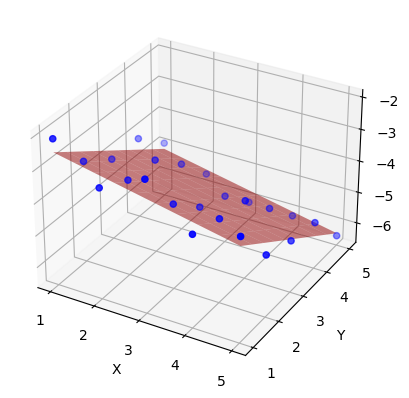

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ouvrir le fichier et remplacer les virgules par des points
with open('data/nuage_de_points.txt', 'r') as file:
    data = file.read().replace(',', '.')

# Sauvegarder dans un nouveau fichier temporaire
with open('data/nuage_de_points_clean.txt', 'w') as file:
    file.write(data)

# Charger les données nettoyées
data = np.loadtxt('data/nuage_de_points_clean.txt', skiprows=1)

# Séparer les colonnes en X, Y et Z
X = data[:, 0]
Y = data[:, 1]
Z = data[:, 2]

# Ajout de l'ordonnée constante pour la régression
A = np.c_[X, Y, np.ones(X.shape[0])]

# Calcul des moindres carrés
coefficients, _, _, _ = np.linalg.lstsq(A, Z, rcond=None)
a, b, c = coefficients

# Affichage de l'équation du plan
print(f"Le plan des moindres carrés est : Z = {a:.3f}X + {b:.3f}Y + {c:.3f}")

# Tracé du nuage de points et du plan
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, color='b')

# Création d'une grille pour tracer le plan
x_surf, y_surf = np.meshgrid(np.linspace(X.min(), X.max(), 10), np.linspace(Y.min(), Y.max(), 10))
z_surf = a * x_surf + b * y_surf + c

# Tracé du plan des moindres carrés
ax.plot_surface(x_surf, y_surf, z_surf, color='r', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
